In [ ]:
!pip install pandas numpy scikit-learn nltk spacy matplotlib seaborn tensorflow keras


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
print("All libraries installed and imported successfully!")


All libraries installed and imported successfully!


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 89.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving fake reviews dataset.csv to fake reviews dataset (2).csv


In [ ]:
import pandas as pd
file_path = '/content/fake reviews dataset.csv'  # Update with your uploaded file's path
df = pd.read_csv(file_path)
print("Dataset Preview:\n", df.head())

Dataset Preview:
              category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  


In [ ]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                               text_  \
0  Love this!  Well made, sturdy, and very comfor...   
1  love it, a great upgrade from the original.  I...   
2  This pillow saved my back. I love the look and...   
3  Missing information on how to use it, but it i...   
4  Very nice set. Good quality. We have had the s...   

                                        cleaned_text  
0  love well made sturdy comfortable love itvery ...  
1       love great upgrade original mine couple year  
2            pillow saved back love look feel pillow  
3        missing information use great product price  
4                nice set good quality set two month  


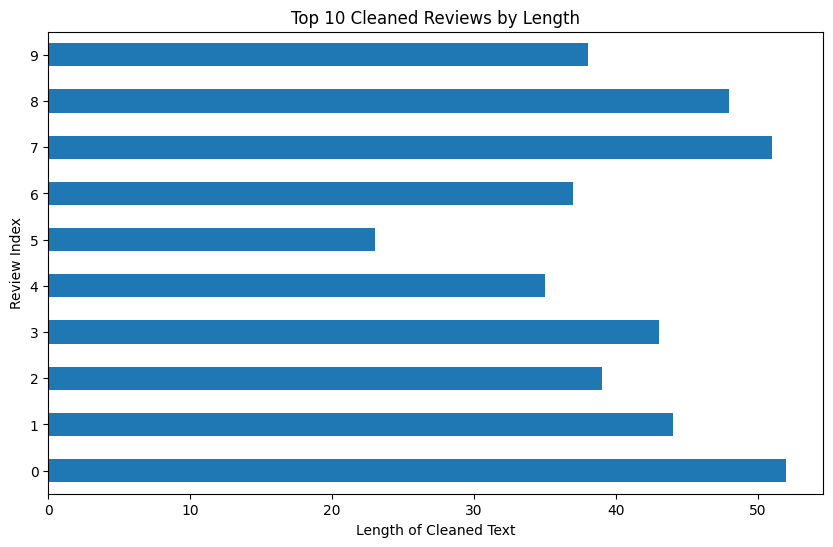

In [ ]:

nltk.download('punkt_tab')


# Initialize objects
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

# Define the preprocessing functions

# 1. Remove stopwords and punctuation
def remove_stopwords_and_punctuation(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words and word.isalnum()]  # Remove stopwords and non-alphanumeric
    return " ".join(tokens)

# 2. Tokenization
def tokenize(text):
    return word_tokenize(text)

# 3. Stemming
def stem(text):
    tokens = word_tokenize(text)
    return " ".join([stemmer.stem(word) for word in tokens])

# 4. Lemmatization
def lemmatize(text):
    tokens = word_tokenize(text)
    return " ".join([lemmatizer.lemmatize(word) for word in tokens])

# 5. Text Normalization
def normalize_text(text):
    # Expand contractions (like "I'm" to "I am")
    contractions = {"i'm": "i am", "i've": "i have", "i'll": "i will", "don't": "do not", "can't": "cannot", "you're": "you are"}

    # Lowercase the text
    text = text.lower()

    # Replace contractions
    for word, replacement in contractions.items():
        text = text.replace(word, replacement)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# 6. Complete Preprocessing Pipeline
def preprocess(text):
    text = normalize_text(text)  # Normalize text first
    text = remove_stopwords_and_punctuation(text)  # Remove stopwords and punctuation
    text = lemmatize(text)  # Lemmatize text
    return text

# Assuming your dataset is loaded in a pandas DataFrame 'df' with a column 'review_text'
# Example of how to load the dataset (uncomment and modify the path if needed)
# df = pd.read_csv('your_dataset.csv')  # Replace with your dataset file path

# Apply preprocessing function to the 'review_text' column
df['cleaned_text'] = df['text_'].apply(preprocess)

# Show the first few rows of the cleaned text
print(df[['text_', 'cleaned_text']].head())

# Calculate the length of each cleaned review
df['cleaned_text_length'] = df['cleaned_text'].apply(len)

# Plot the length of the first 10 cleaned reviews
plt.figure(figsize=(10,6))
df['cleaned_text_length'].head(10).plot(kind='barh')
plt.title('Top 10 Cleaned Reviews by Length')
plt.xlabel('Length of Cleaned Text')
plt.ylabel('Review Index')
plt.show()





<ipython-input-23-e6fe7bcf077b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette='Set2')


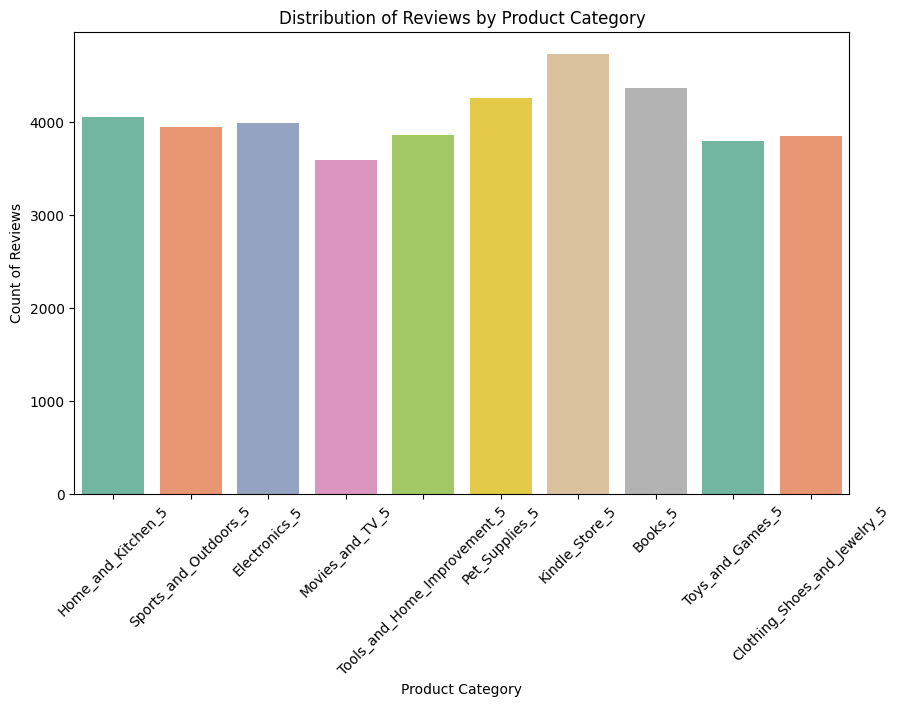

In [ ]:
import matplotlib.pyplot as plt  #Distribution of Reviews by Category
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='category', palette='Set2')
plt.title('Distribution of Reviews by Product Category')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Count of Reviews')
plt.show()


<ipython-input-24-8376ec05c129>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='Set1')


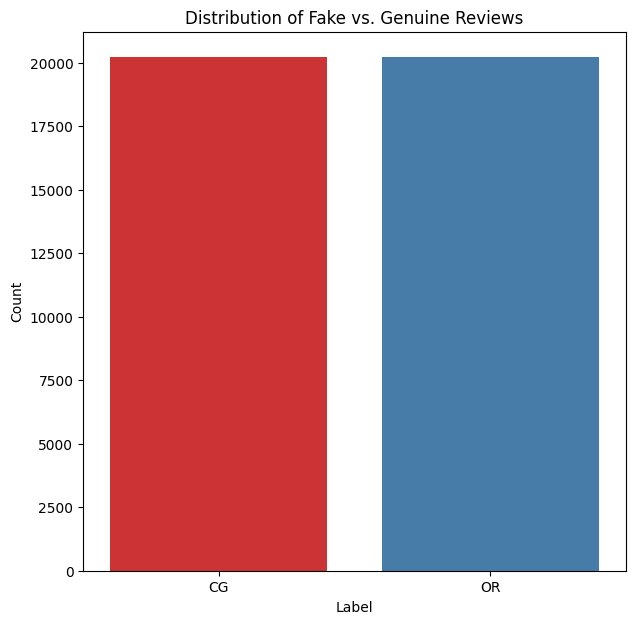

In [ ]:
plt.figure(figsize=(7,7))  #Distribution of Labels (Fake vs. Genuine Reviews)
sns.countplot(data=df, x='label', palette='Set1')
plt.title('Distribution of Fake vs. Genuine Reviews')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

<ipython-input-25-ea9ca440c577>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='viridis')


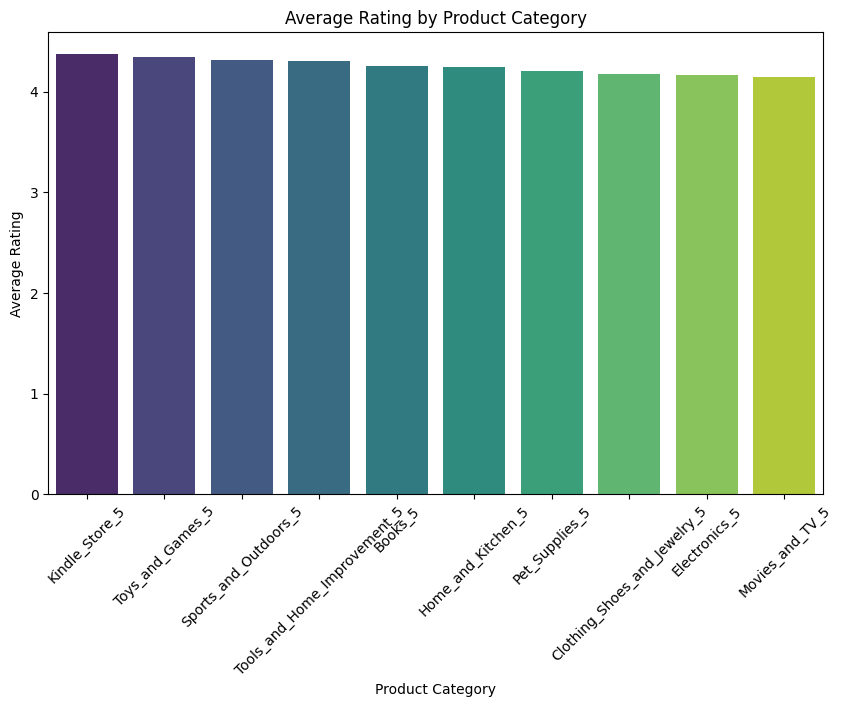

In [ ]:
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False) #Average Rating by Category
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='viridis')
plt.title('Average Rating by Product Category')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.show()


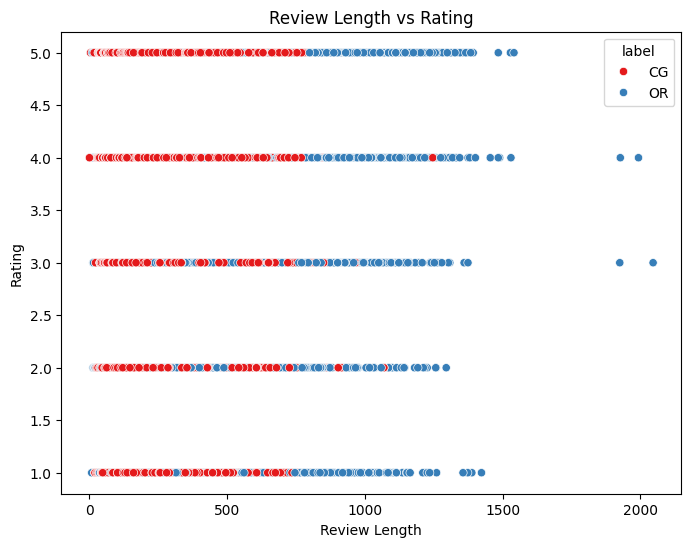

In [ ]:
plt.figure(figsize=(8,6))  #Review Length vs Rating (Scatter Plot)
sns.scatterplot(data=df, x='cleaned_text_length', y='rating', hue='label', palette='Set1')
plt.title('Review Length vs Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.show()

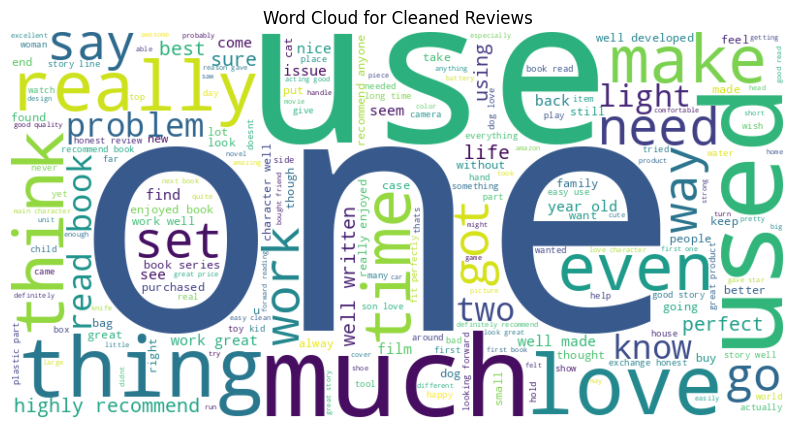

In [ ]:
from wordcloud import WordCloud #Word Cloud for Cleaned Reviews

# Generate word cloud
text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cleaned Reviews')
plt.show()


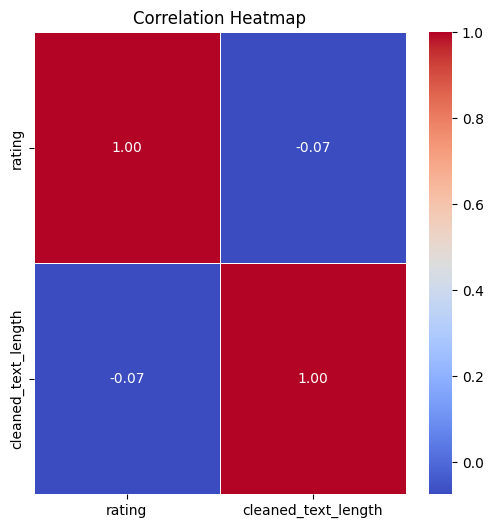

In [ ]:
# Create a correlation matrix #Correlation Heatmap
corr = df[['rating', 'cleaned_text_length']].corr()

# Plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-31-d5c486d8fbf8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='label', y='cleaned_text_length', palette='Set2')


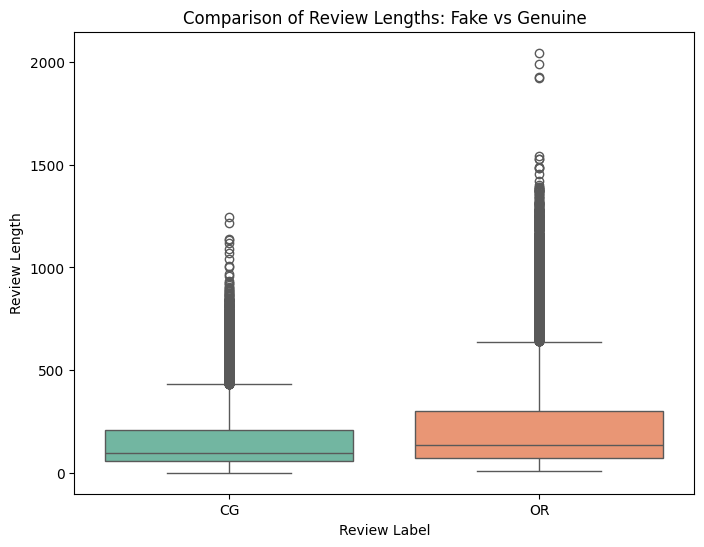

In [ ]:
plt.figure(figsize=(8,6)) #Comparison of Review Length Between Fake and Genuine Reviews

sns.boxplot(data=df, x='label', y='cleaned_text_length', palette='Set2')
plt.title('Comparison of Review Lengths: Fake vs Genuine')
plt.xlabel('Review Label')
plt.ylabel('Review Length')
plt.show()

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from textblob import TextBlob
from scipy.stats import zscore

# Assuming df is the DataFrame with the columns: category, rating, label, review_text, cleaned_text, length

# 1. TF-IDF Vectorization
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned reviews to get the feature matrix
X_tfidf = vectorizer.fit_transform(df['cleaned_text']).toarray()

# Convert the result to a DataFrame
tfidf_df = pd.DataFrame(X_tfidf, columns=vectorizer.get_feature_names_out())

# Show the first few rows of the TF-IDF features
print("TF-IDF Features:")
print(tfidf_df.head())

# 2. Sentiment Analysis (Using TextBlob)
# Apply sentiment analysis to each review
df['sentiment'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Show the first few sentiment scores
print("\nSentiment Analysis:")
print(df[['text_', 'sentiment']].head())

# 3. Bag of Words (BoW)
# Initialize the CountVectorizer for Bag of Words
vectorizer_bow = CountVectorizer(max_features=5000)

# Fit and transform the cleaned reviews to get the BoW feature matrix
X_bow = vectorizer_bow.fit_transform(df['cleaned_text']).toarray()

# Convert the result to a DataFrame
bow_df = pd.DataFrame(X_bow, columns=vectorizer_bow.get_feature_names_out())

# Show the first few rows of the BoW features
print("\nBag of Words Features:")
print(bow_df.head())

# 4. Outlier Detection (Using Z-Score and IQR)
# Calculate Z-scores for the 'length' column
df['length_zscore'] = zscore(df['cleaned_text_length'])

# Flag reviews with Z-scores greater than 3 or less than -3 (outliers based on length)
outliers_zscore = df[df['length_zscore'].abs() > 3]

print("\nOutliers based on Z-Score (Length):")
print(outliers_zscore[['text_', 'cleaned_text_length', 'length_zscore']])

# IQR Method for outlier detection based on 'length'
Q1 = df['cleaned_text_length'].quantile(0.25)
Q3 = df['cleaned_text_length'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside the 1.5 * IQR range
outliers_iqr = df[(df['cleaned_text_length'] < (Q1 - 1.5 * IQR)) | (df['cleaned_text_length'] > (Q3 + 1.5 * IQR))]

print("\nOutliers based on IQR (Length):")
print(outliers_iqr[['text_', 'cleaned_text_length']])

# 5. Combining Features
# Combine all the features into one dataset
X_combined = pd.concat([tfidf_df, bow_df, df[['sentiment', 'length_zscore']]], axis=1)

# Show the first few rows of the combined features
print("\nCombined Features:")
print(X_combined.head())


TF-IDF Features:
    10  100  1000  105  1080p   11   12  125   13  130  ...  youve   yr  zero  \
0  0.0  0.0   0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   
1  0.0  0.0   0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   
2  0.0  0.0   0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   
3  0.0  0.0   0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   
4  0.0  0.0   0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0  0.0   0.0   

   zip  zipper  zippered  zoe  zombie  zone  zoom  
0  0.0     0.0       0.0  0.0     0.0   0.0   0.0  
1  0.0     0.0       0.0  0.0     0.0   0.0   0.0  
2  0.0     0.0       0.0  0.0     0.0   0.0   0.0  
3  0.0     0.0       0.0  0.0     0.0   0.0   0.0  
4  0.0     0.0       0.0  0.0     0.0   0.0   0.0  

[5 rows x 5000 columns]

Sentiment Analysis:
                                               text_  sentiment
0  Love this!  Well made, sturdy, and very comfor...   0.412500
1  love it

<ipython-input-33-7cefd9f1b974>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Pastel1')


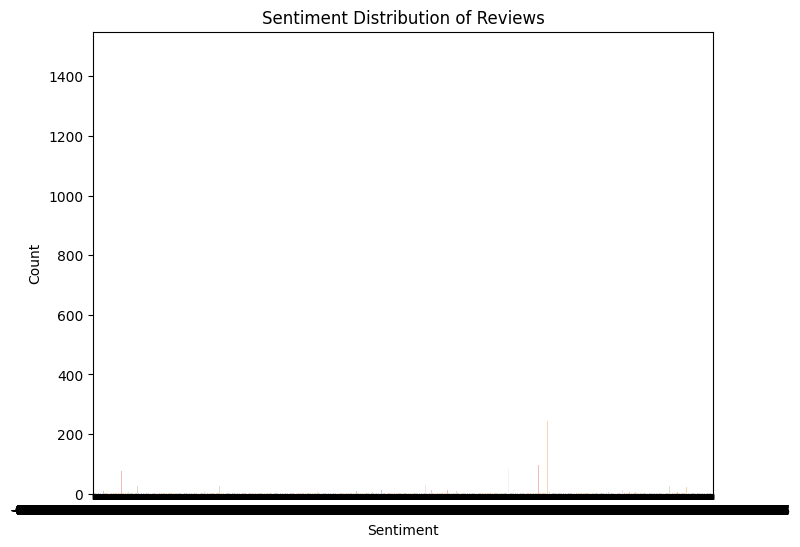

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='sentiment', palette='Pastel1')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

<ipython-input-34-e393e1b1e767>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clipped, x='sentiment', palette='Pastel1')


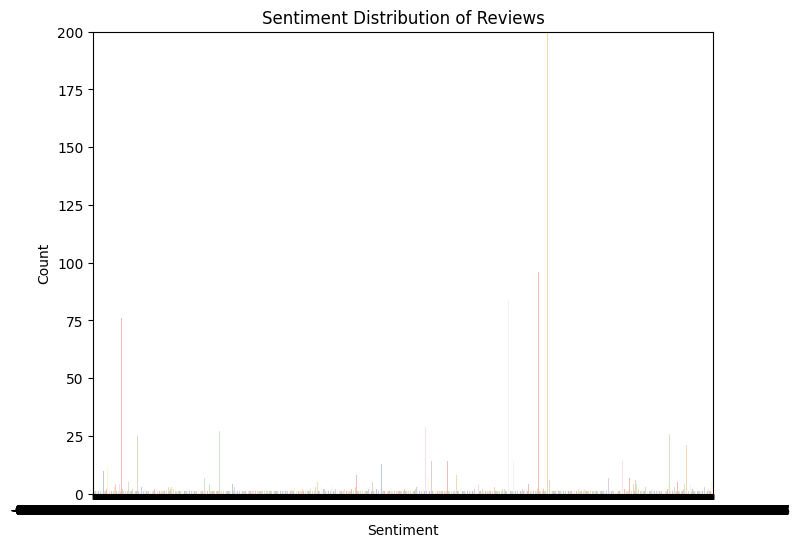

In [ ]:
df_clipped = df[df['sentiment'].between(-1, 1)]  # Assuming sentiment values are between -1 and 1

# Plot the sentiment distribution with clipped data
plt.figure(figsize=(8,6))
sns.countplot(data=df_clipped, x='sentiment', palette='Pastel1')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot with count capped at 200
plt.ylim(0, 200)
plt.show()

In [ ]:
df.head()

,category,rating,label,text_,cleaned_text,cleaned_text_length,sentiment,length_zscore
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor...",love well made sturdy comfortable love itvery ...,52,0.412500,-0.685659
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I...",love great upgrade original mine couple year,44,0.558333,-0.721875
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...,pillow saved back love look feel pillow,39,0.250000,-0.744510
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i...",missing information use great product price,43,0.300000,-0.726402
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...,nice set good quality set two month,35,0.650000,-0.762619


In [ ]:
import pandas as pd
from google.colab import files

# Assuming df is your DataFrame and you want to save the first 5 rows
data = df

# Save the DataFrame to a CSV file
df.to_csv('preprocess_df.csv', index=False)

# Download the CSV file
files.download('preprocess_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>